In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


<Axes: xlabel='count', ylabel='Exited'>

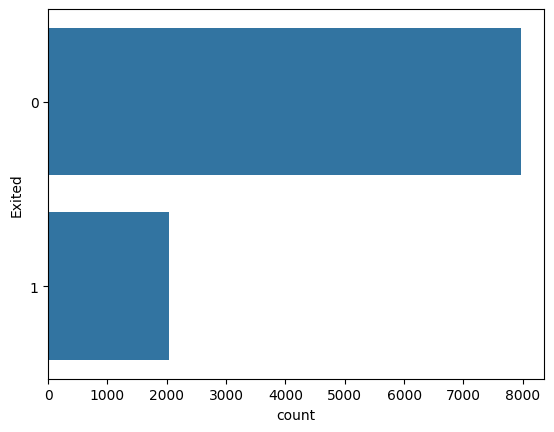

In [ ]:
sns.countplot(y = y)

<ipython-input-27-31eddef86d37>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(X['Geography'],palette='pastel')


<Axes: xlabel='count', ylabel='Geography'>

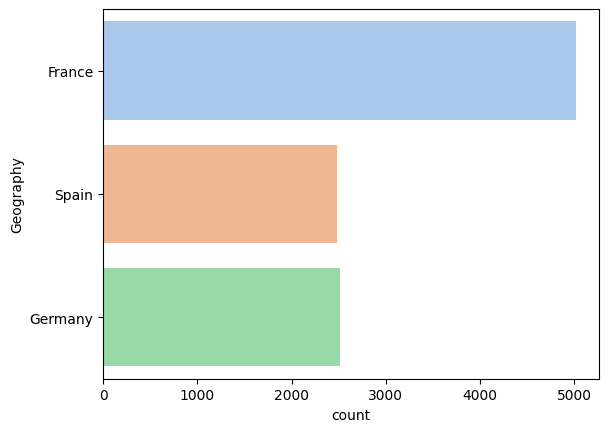

In [ ]:
sns.countplot(X['Geography'],palette='pastel')

Gender
Male      5457
Female    4543
Name: count, dtype: int64


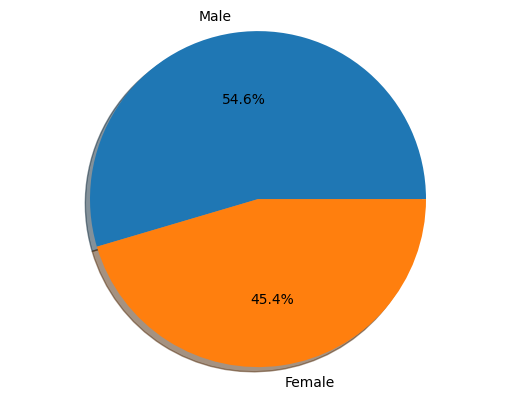

In [ ]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Geography', ylabel='Exited'>

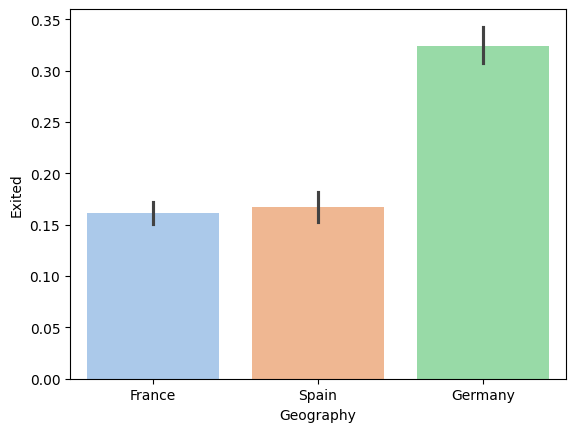

In [ ]:
sns.barplot(x='Geography', y='Exited', data=df,palette = 'pastel')

<ipython-input-30-79efcf38d8c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exited', data=df,palette='rocket')


<Axes: xlabel='Gender', ylabel='Exited'>

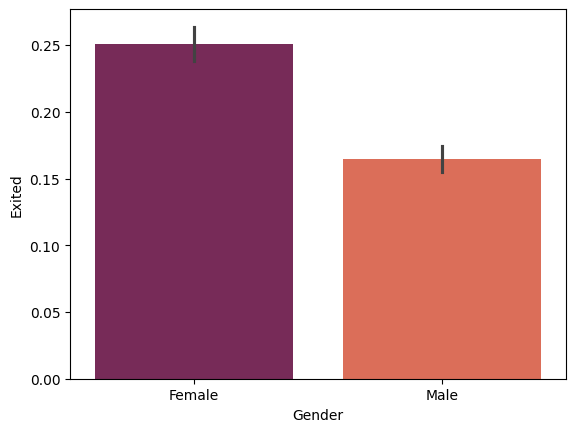

In [ ]:
sns.barplot(x='Gender', y='Exited', data=df,palette='rocket')

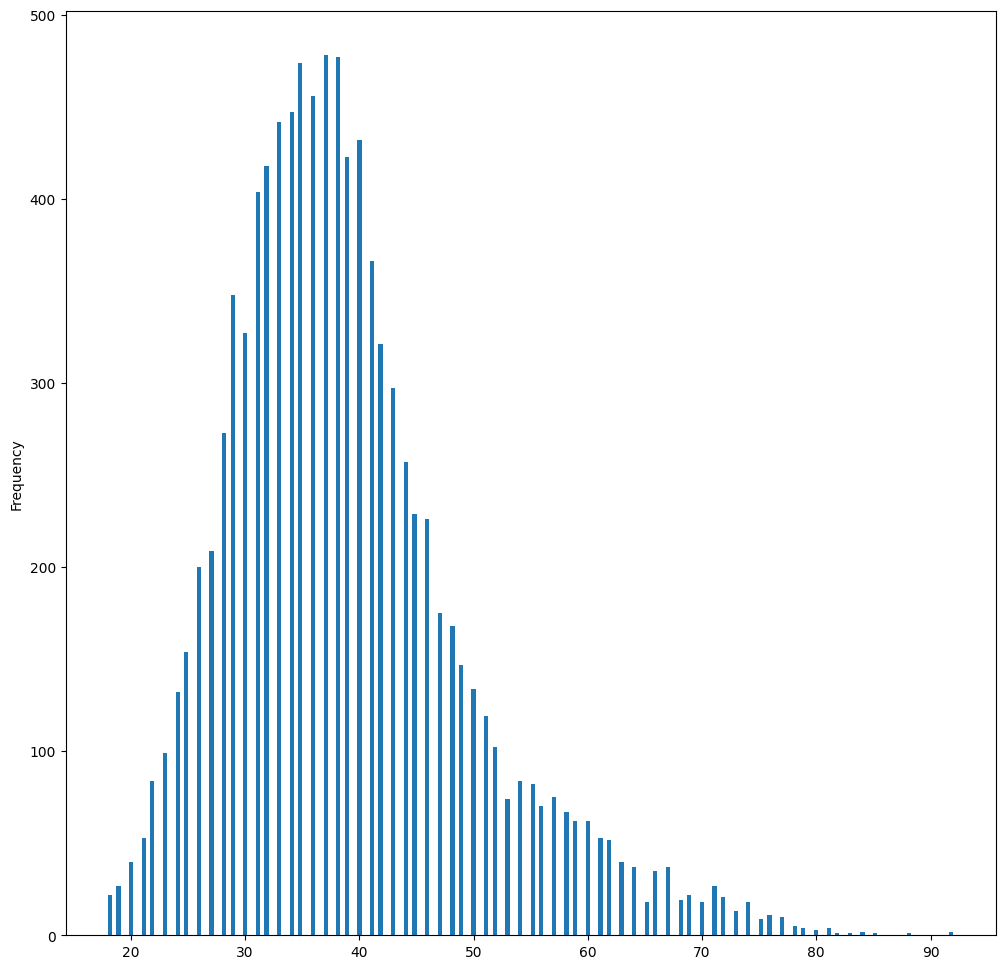

In [ ]:
df.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

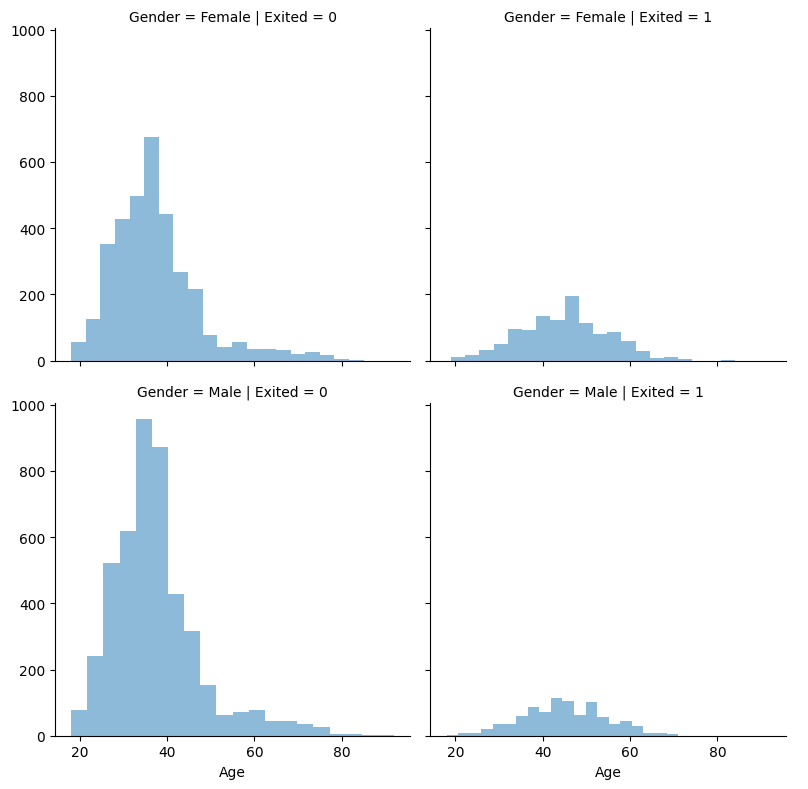

In [ ]:
g = sns.FacetGrid(df, row='Gender', col='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

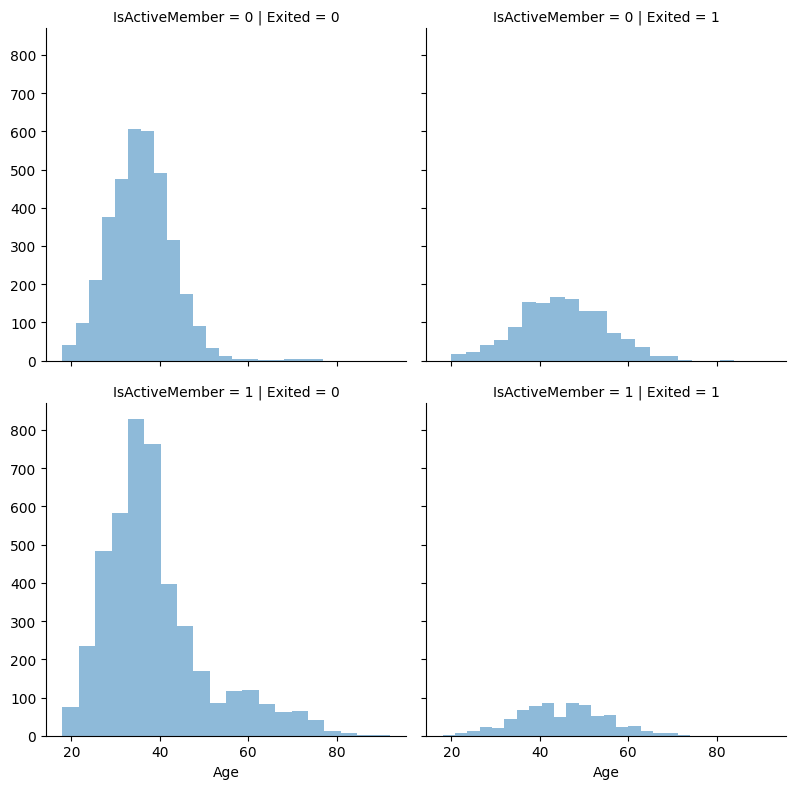

In [ ]:
g = sns.FacetGrid(df, row='IsActiveMember', col='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int64


In [ ]:
X['Geography']=label.fit_transform(X['Geography'])
print(X['Geography'].head())
X['Geography'].value_counts()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64


Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#onehotencoding = OneHotEncoder(categorical_features  = [1])
#X = onehotencoding.fit_transform(X).toarray()
#print(X)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming X is your DataFrame
# Handle_unknown='ignore' is used to handle any unknown categories during transformation
encoder = OneHotEncoder(handle_unknown='ignore')

# Select the categorical column(s) you want to one-hot encode
# In this example, we assume 'Geography' is the categorical column at index 1
categorical_cols = ['Geography']
# Transform the selected columns
encoded_data = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data.toarray(),
                         columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical column(s) from X
X = X.drop(categorical_cols, axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X, encoded_df], axis=1)

print(X.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_0  Geography_1  Geography_2  
0               1        101348.88          1.0          0.0          0.0  
1               1        112542.58          0.0          0.0          1.0  
2               0        113931.57          1.0          0.0          0.0  
3               0         93826.63          1.0          0.0          0.0  
4               1         79084.10          0.0          0.0          1.0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
X_train

array([[ 1.07684322,  1.50034763,  0.90565911, ...,  0.64722807,
         0.96581473,  0.56276126],
       [ 0.22458265,  1.50034763, -1.10416821, ...,  0.64722807,
         0.96581473, -1.58504165],
       [-0.46138317, -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -1.07751299],
       ...,
       [ 0.85858137, -0.90168675, -1.10416821, ..., -1.54505043,
        -1.03539526, -0.1530867 ],
       [ 0.1518287 , -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -0.06146547],
       [ 0.46363135,  0.29933044,  0.90565911, ...,  0.64722807,
         0.96581473, -0.82256561]])

In [ ]:
X_test

array([[-0.58610423,  0.29933044,  0.90565911, ..., -1.54505043,
        -1.03539526, -1.02689323],
       [-0.30548185, -0.90168675,  0.90565911, ...,  0.64722807,
         0.96581473,  0.78530321],
       [-0.53413712,  1.50034763, -1.10416821, ...,  0.64722807,
        -1.03539526, -0.73627661],
       ...,
       [ 0.60913925, -0.90168675, -1.10416821, ..., -1.54505043,
        -1.03539526, -0.86130337],
       [-1.31364374,  1.50034763, -1.10416821, ...,  0.64722807,
        -1.03539526,  0.15695849],
       [-0.74200555,  0.29933044, -1.10416821, ...,  0.64722807,
        -1.03539526,  0.69271637]])

In [ ]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6500, 10) (6500,)
Test set: (3500, 10) (3500,)


In [ ]:
# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Train Model
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [ ]:
#Prediction
prediction = neigh.predict(X_test)

In [ ]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Accuracy
from sklearn import metrics
percent1 = metrics.accuracy_score(y_test, prediction)
percent1

0.8371428571428572

In [ ]:
# Now Using SVM Algorithm
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
#Predict
y_pred=classifier.predict(X_test)

In [ ]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Accuracy
percent2 =metrics.accuracy_score(y_test, prediction2)
percent2

0.864

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
classifier_4.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predict
y_randomfor=classifier_4.predict(X_test)

In [ ]:
prediction3=pd.DataFrame(y_randomfor)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Accuracy
percent3 = metrics.accuracy_score(y_test, prediction3)
percent3

0.8665714285714285

In [ ]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
TeleTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
TeleTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predtree = TeleTree.predict(X_test)

In [ ]:
prediction4=pd.DataFrame(y_pred)
prediction4.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Accuracy
percent4 = metrics.accuracy_score(y_test,prediction4)
percent4

0.864

In [ ]:
models = pd.DataFrame({'name_model':["KNN","SVM","Random Forest","Decision Trees"],\
                        'accuracy_percentage':[percent1,percent2,percent3,percent4]})

In [ ]:
models

,name_model,accuracy_percentage
0,KNN,0.837143
1,SVM,0.864000
2,Random Forest,0.866571
3,Decision Trees,0.864000


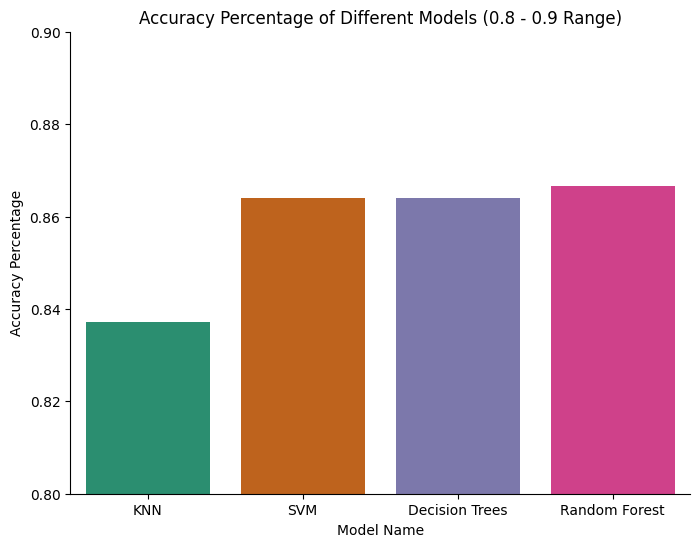

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Sort the DataFrame by accuracy percentage
models = models.sort_values('accuracy_percentage')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name_model', y='accuracy_percentage', data=models, palette='Dark2')

# Set y-axis limits
plt.ylim(0.8, 0.9)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy Percentage')
plt.title('Accuracy Percentage of Different Models (0.8 - 0.9 Range)')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score

# KNN
recall_knn = recall_score(y_test, prediction)
precision_knn = precision_score(y_test, prediction)

# SVM
recall_svm = recall_score(y_test, prediction2)
precision_svm = precision_score(y_test, prediction2)

# Random Forest
recall_rf = recall_score(y_test, prediction3)
precision_rf = precision_score(y_test, prediction3)

# Decision Tree
recall_dt = recall_score(y_test, prediction4)
precision_dt = precision_score(y_test, prediction4)

# Create DataFrame to store results
results = pd.DataFrame({
    'Model': ["KNN", "SVM", "Random Forest", "Decision Trees"],
    'Accuracy': [percent1, percent2, percent3, percent4],
    'Recall': [recall_knn, recall_svm, recall_rf, recall_dt],
    'Precision': [precision_knn, precision_svm, precision_rf, precision_dt]
})

print(results)


            Model  Accuracy    Recall  Precision
0             KNN  0.837143  0.299857   0.718213
1             SVM  0.864000  0.390244   0.842105
2   Random Forest  0.866571  0.457676   0.781863
3  Decision Trees  0.864000  0.390244   0.842105
